# Hypothesis practice

## 1

In [217]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [218]:
n = 100
F_H0 = stats.binom(n, 0.5)

In [219]:
stats.binom_test(33, 100, 0.5, alternative = 'greater')

0.99979561141628659

## 2

In [220]:
pines = pd.read_csv('pines.txt', sep='\t')

In [221]:
pines.tail()

,sn,we
579,169.1,160.0
580,162.5,157.3
581,156.7,155.3
582,154.1,150.8
583,87.7,200.0


In [222]:
pines.shape

(584, 2)

In [223]:
vals = [tuple(x) for x in pines.values]
print(vals[:5])

[(200.0, 8.8000000000000007), (199.30000000000001, 10.0), (193.59999999999999, 22.399999999999999), (167.69999999999999, 35.600000000000001), (183.90000000000001, 45.399999999999999)]


In [224]:
bins_x = np.arange(0, 201, 40, dtype=int)
bins_y = np.arange(0, 201, 40, dtype=int)

In [225]:
res = stats.binned_statistic_2d(x=pines.we, y=pines.sn, values=None, statistic='count', bins=[bins_x, bins_y])

In [226]:
count = res.statistic.ravel()

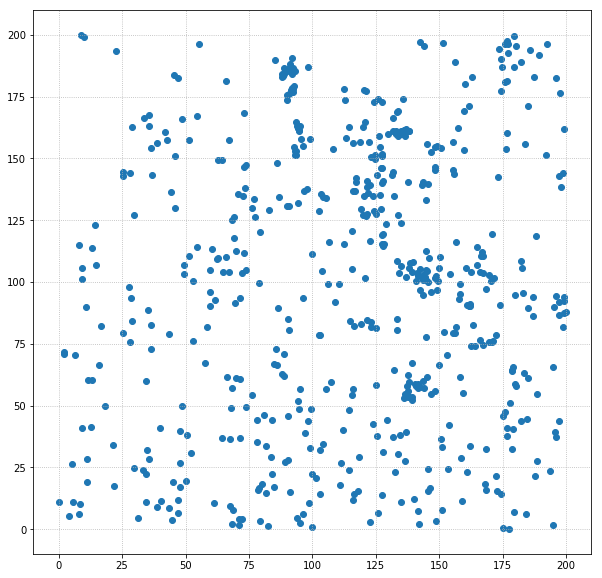

In [227]:
plt.figure(figsize=(10,10))
plt.scatter(pines.we.values, pines.sn.values)
plt.grid(ls=':')

In [228]:
uniform_pines = stats.uniform.rvs(loc=0, scale=200, size=(584, 2))

In [229]:
uniform_pines

array([[  96.80919248,  135.65101082],
       [   3.88105197,  150.71607491],
       [ 110.04367504,  105.06937438],
       ..., 
       [  33.70383948,    7.53877076],
       [  11.24815578,  151.96402416],
       [ 128.05438051,  150.16430786]])

In [230]:
uni_res = stats.binned_statistic_2d(x=uniform_pines[:, 0], y=uniform_pines[:, 1], values=None, statistic='count', bins=[bins_x, bins_y])

In [231]:
uni_count = uni_res.statistic.ravel()

In [232]:
uni_res.statistic.mean()

23.359999999999999

In [233]:
uni_mean = np.ones_like(count) * 23.36

In [234]:
stats.chisquare(count, uni_mean, ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.5746697749672791e-20)